In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
from keras.optimizers import Adam
import keras_tuner
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
import warnings
warnings.filterwarnings('ignore')

C:\Users\PC\AppData\Local\Temp\ipykernel_12420\1500482208.py:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [2]:
data = pd.read_csv("gas_turbines.csv")

In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


In [6]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [8]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


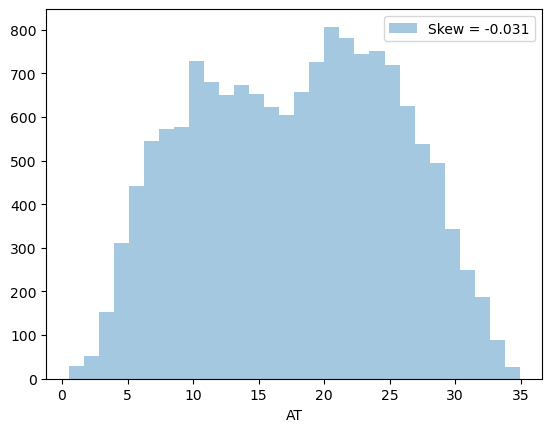

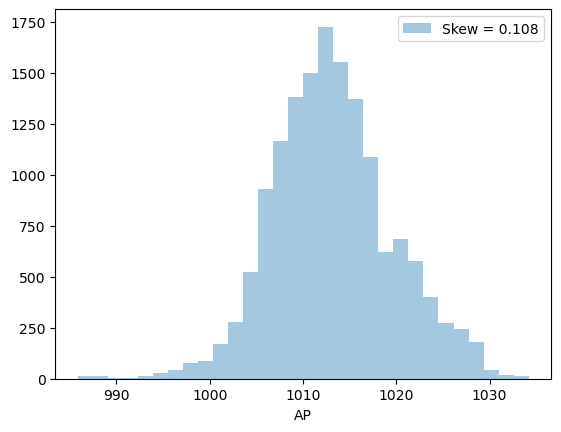

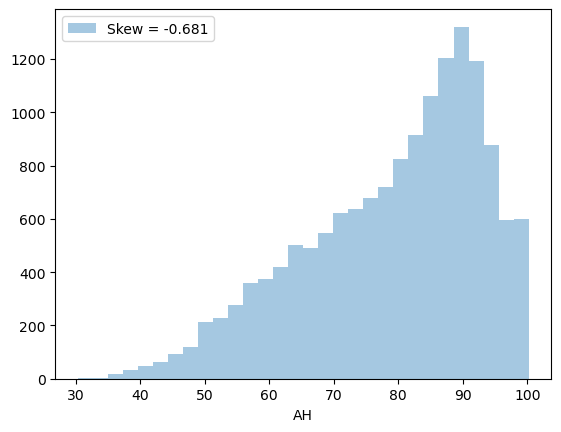

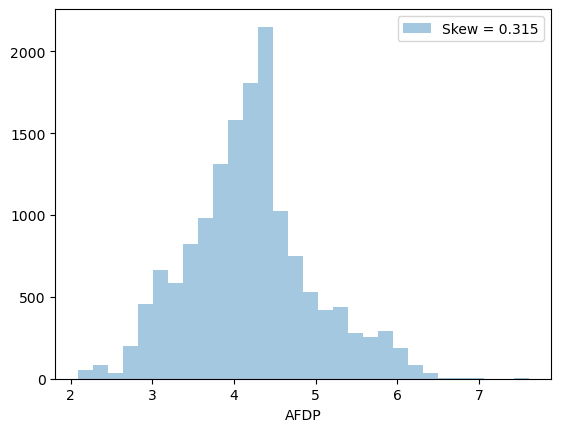

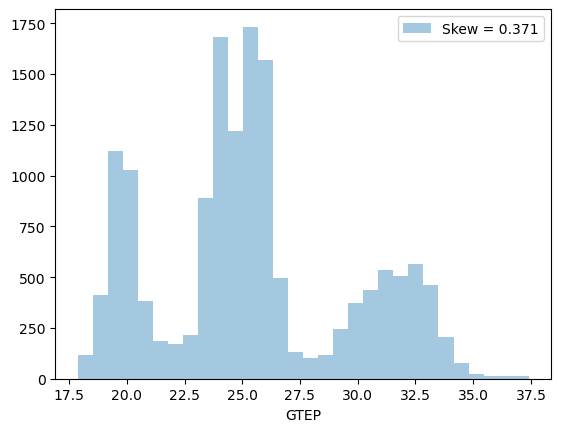

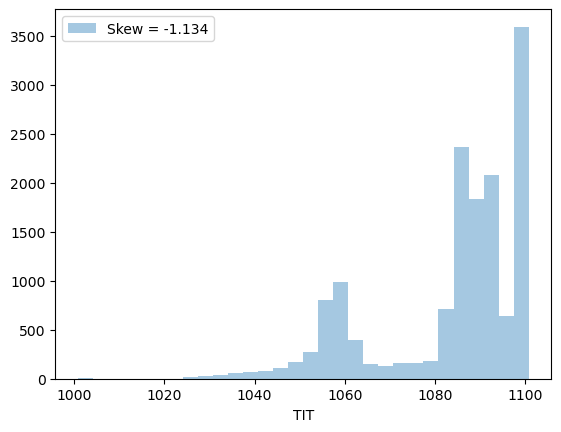

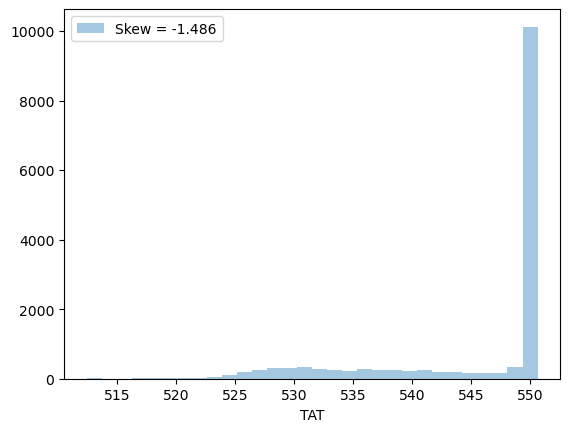

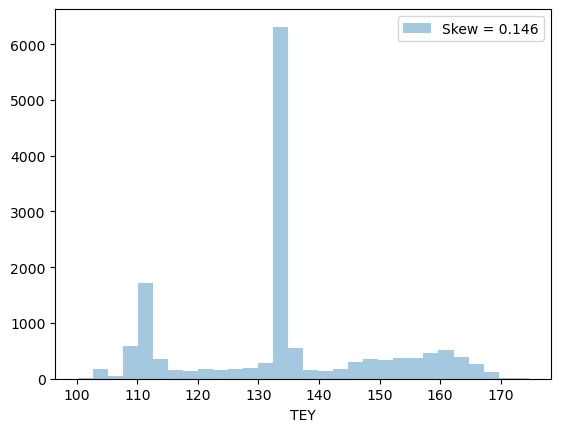

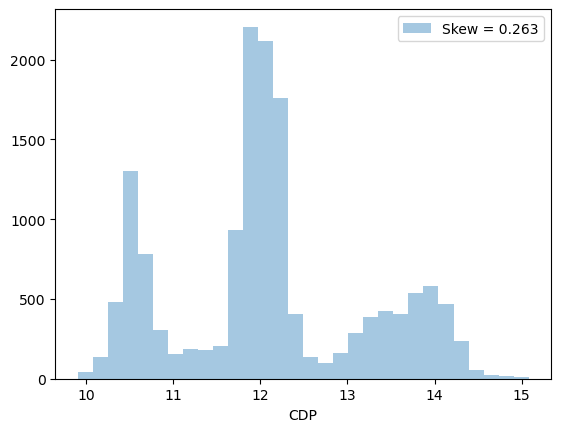

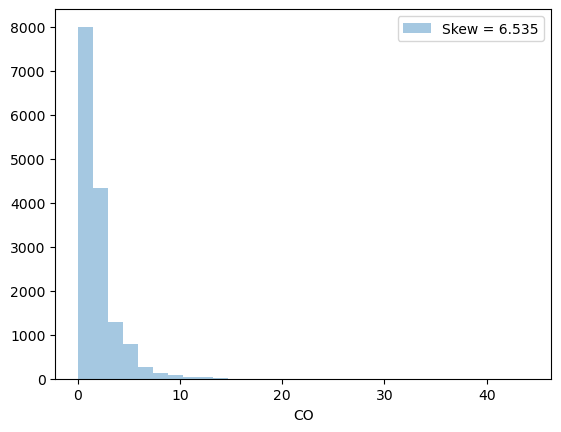

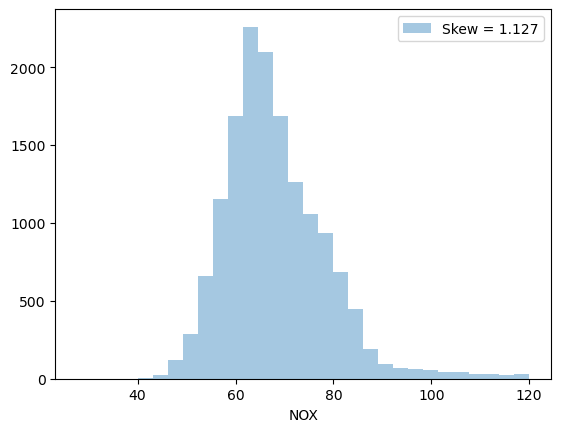

In [9]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

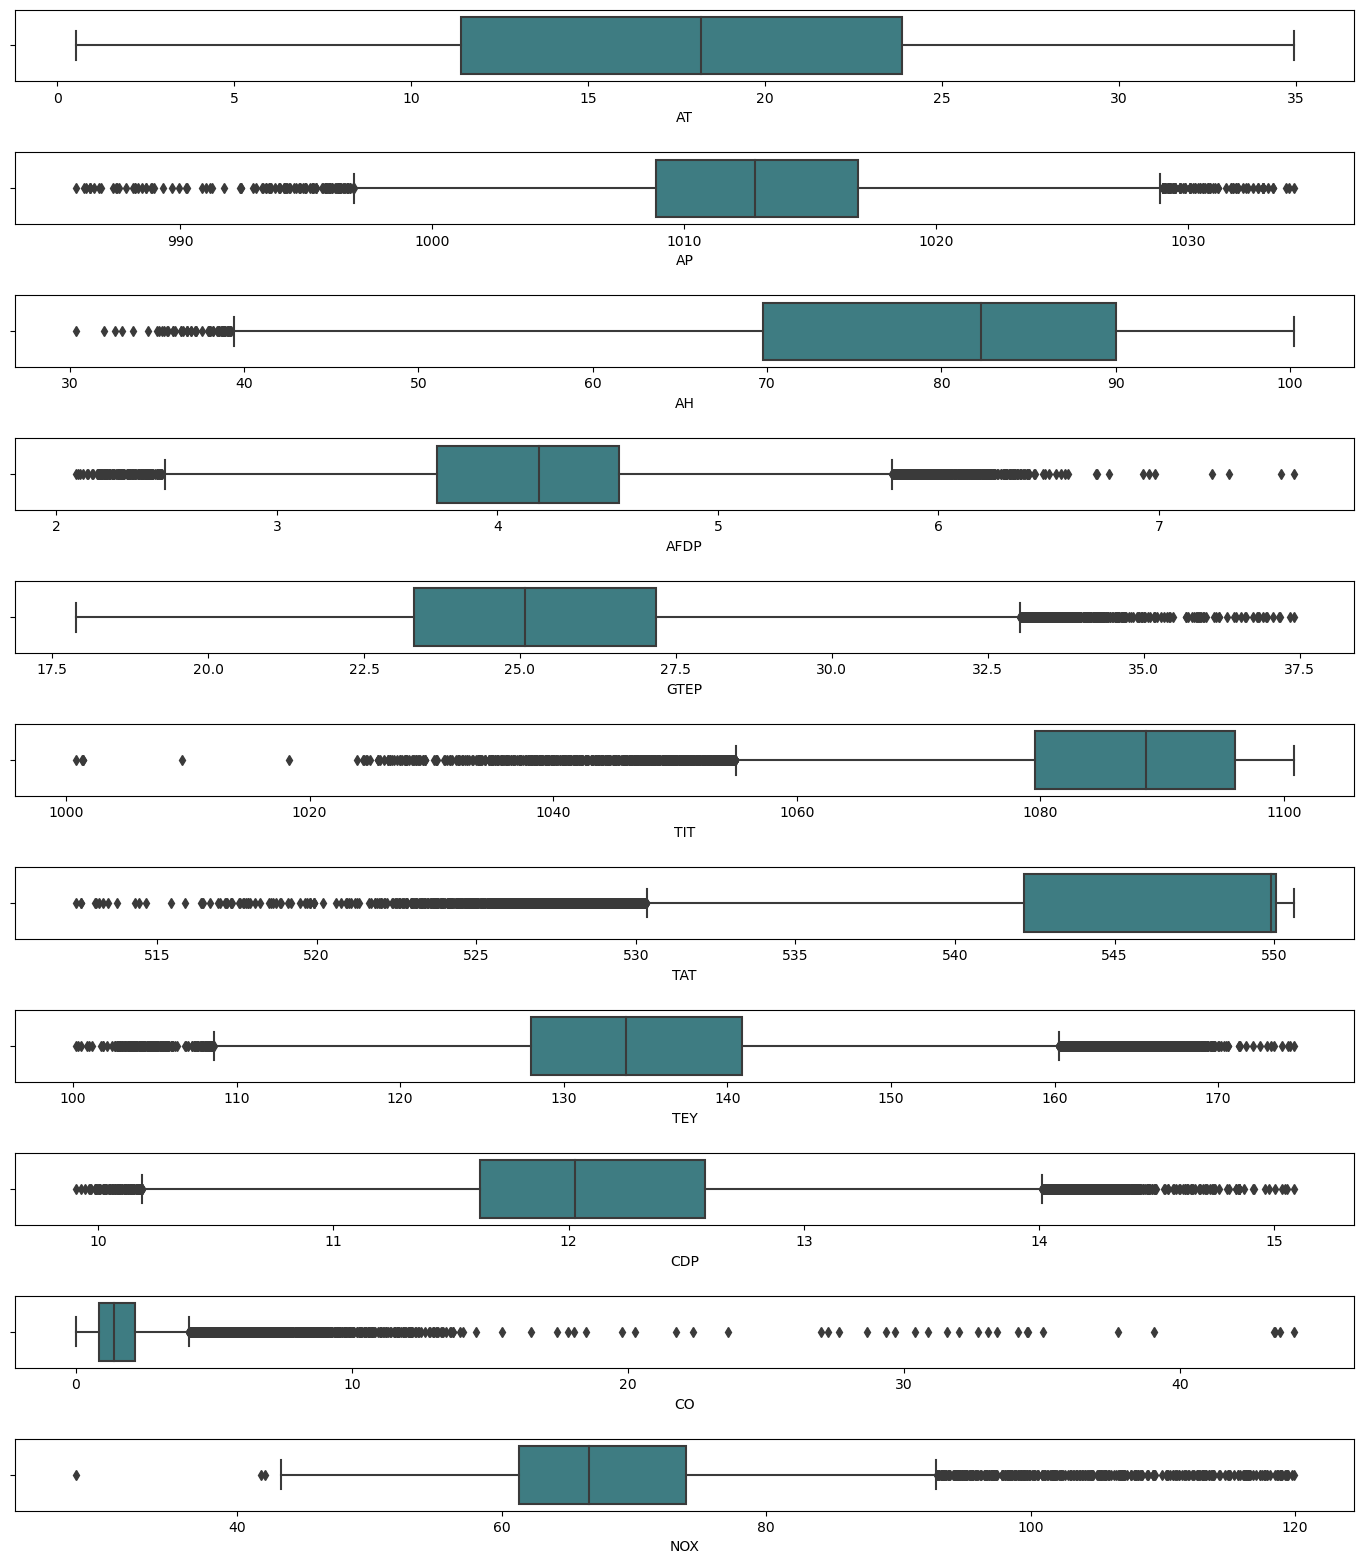

In [10]:
ot=data.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=ot,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=ot,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

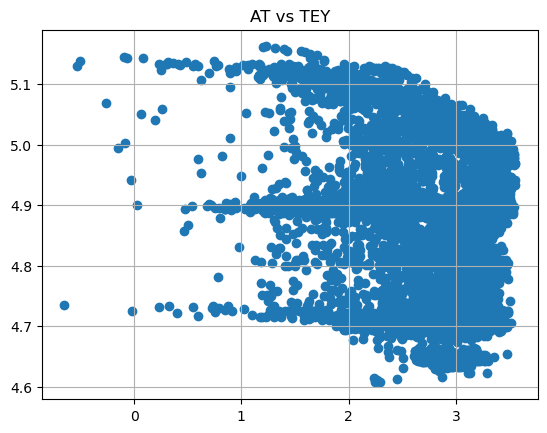

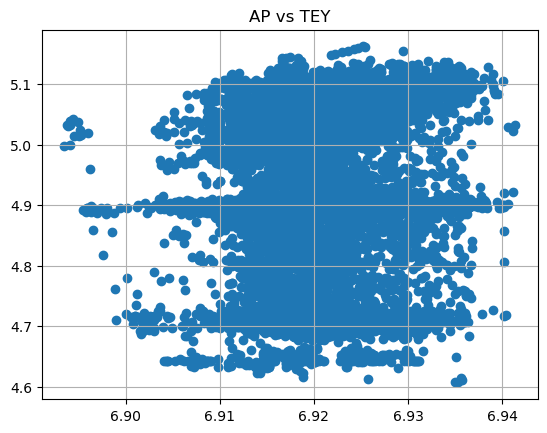

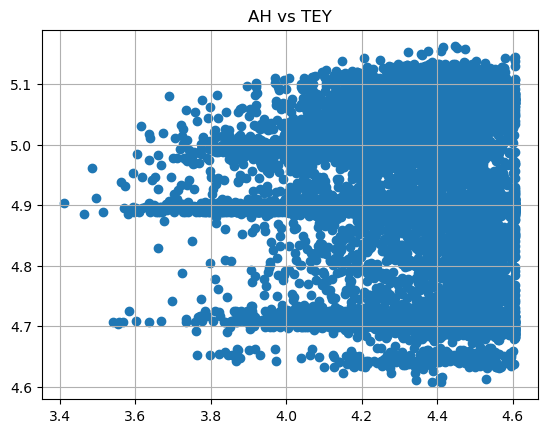

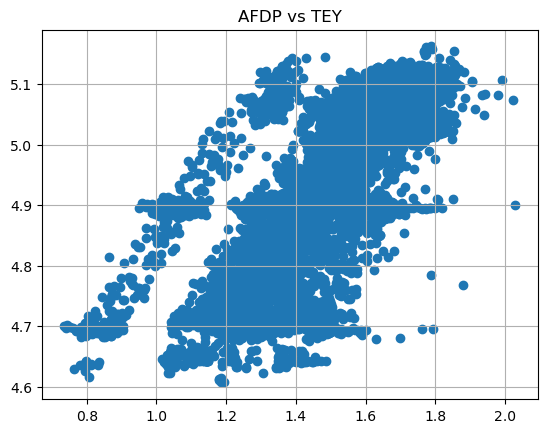

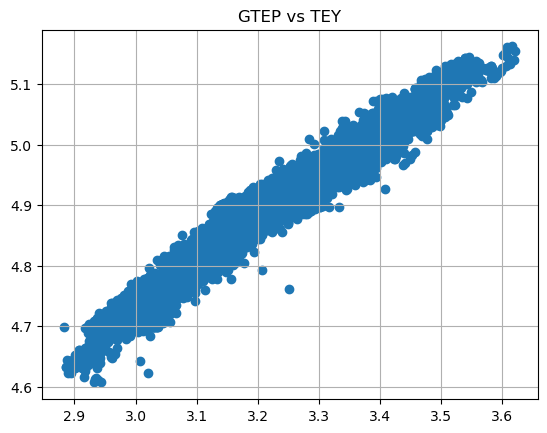

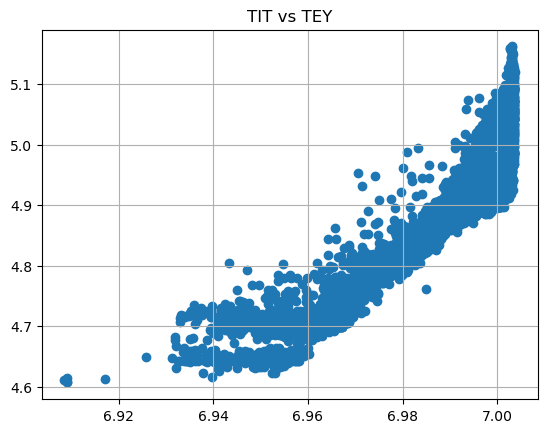

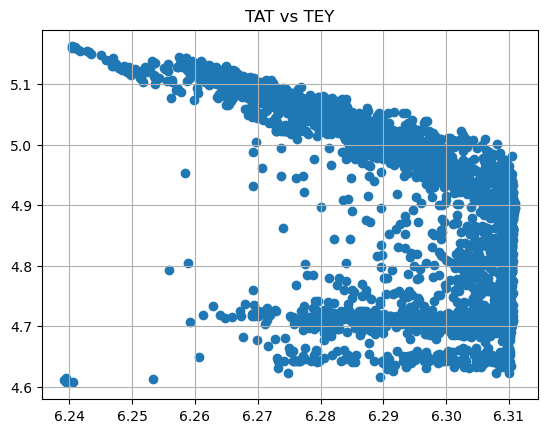

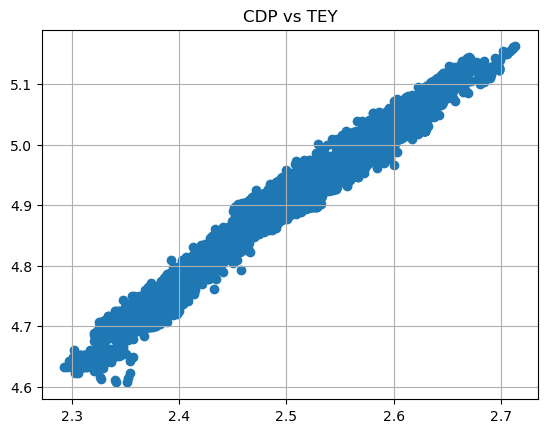

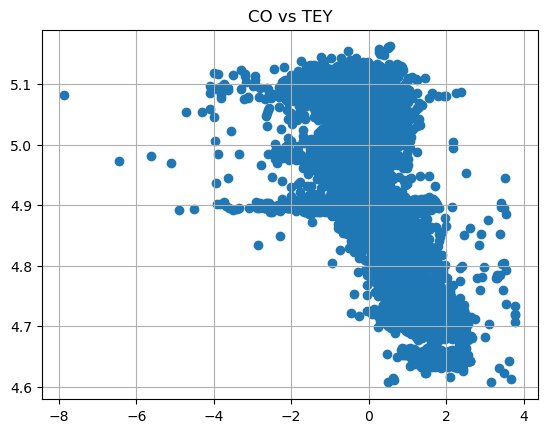

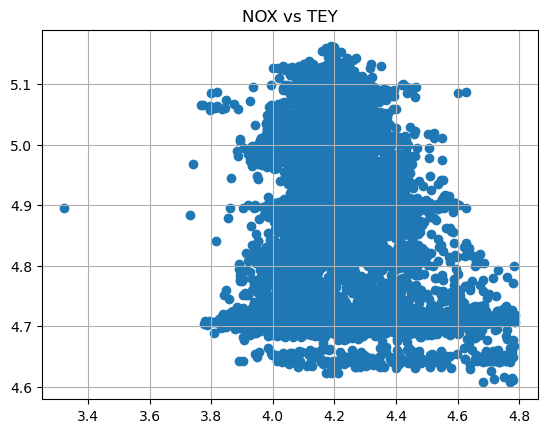

In [11]:
for i in data.columns:
    if i!="TEY": 
        plt.scatter(np.log(data[i]), np.log(data['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

<Figure size 2000x2000 with 0 Axes>

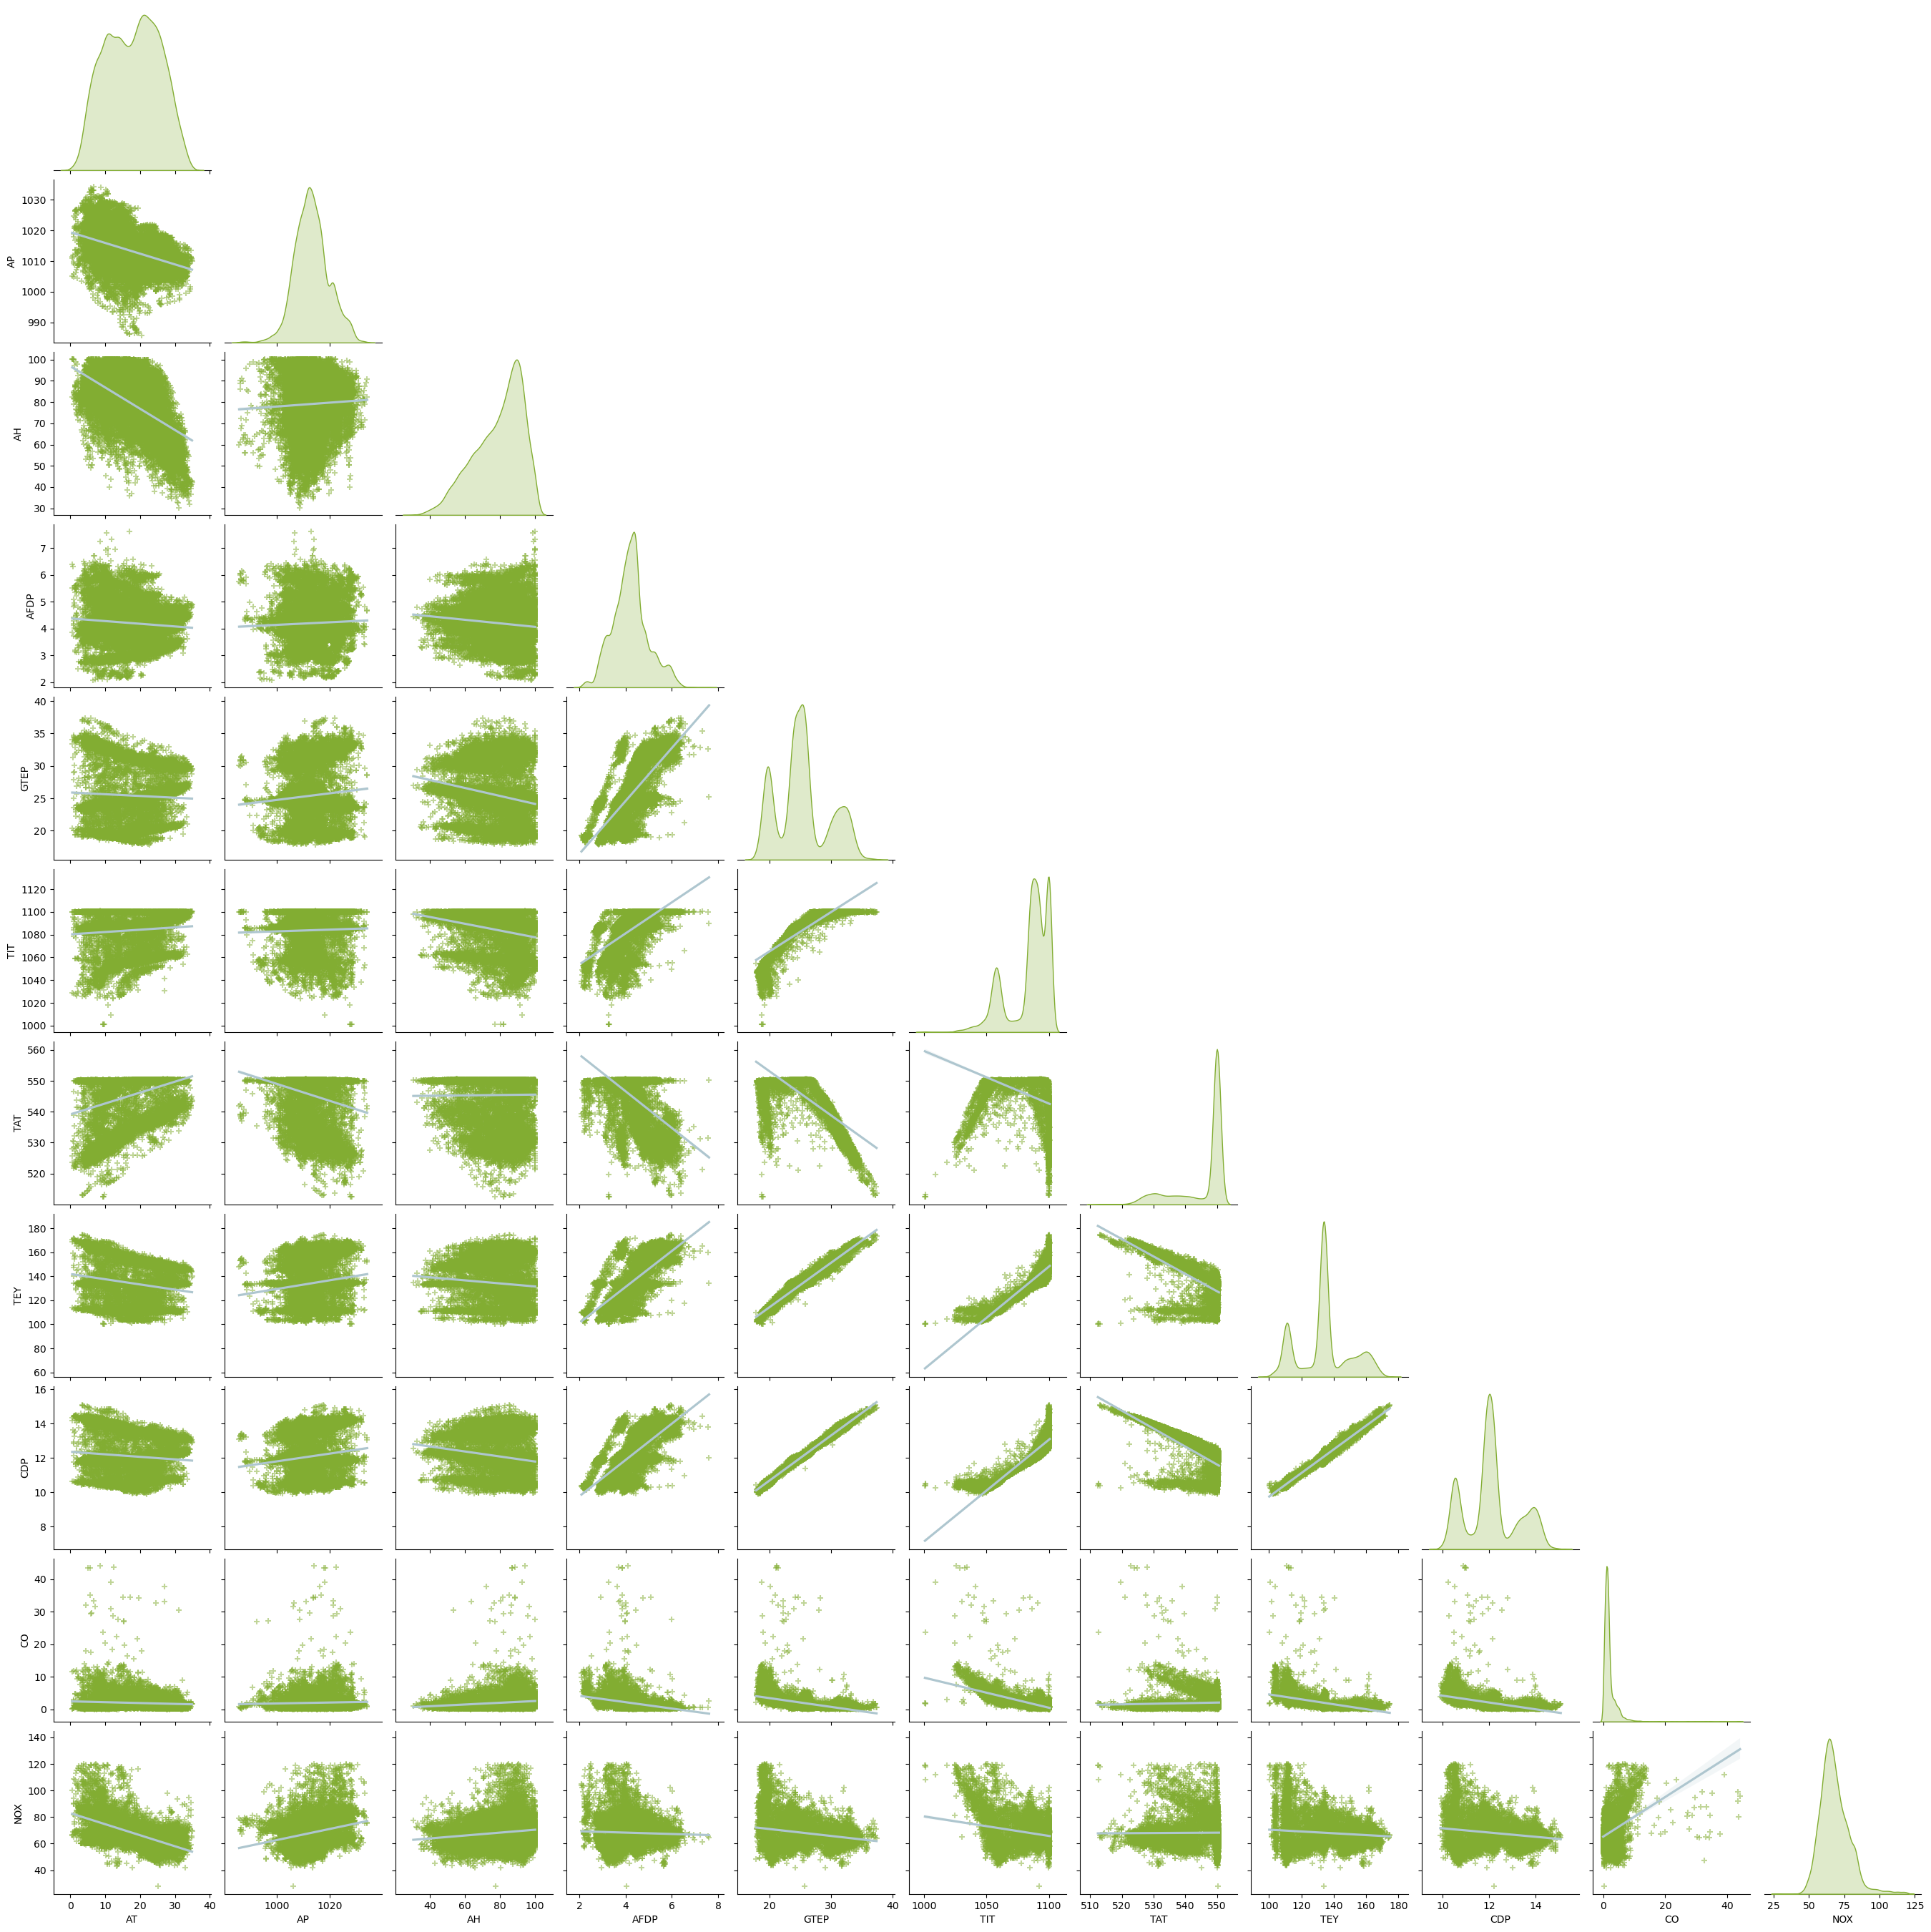

In [12]:
plt.figure(figsize=(20,20))
sns.pairplot(data,
                 markers="+",
                 kind='reg',
                 diag_kind="kde",
                 plot_kws={'line_kws':{'color':'#aec6cf'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#82ad32'}},
               corner=True,
                 diag_kws= {'color': '#82ad32'})

<AxesSubplot:>

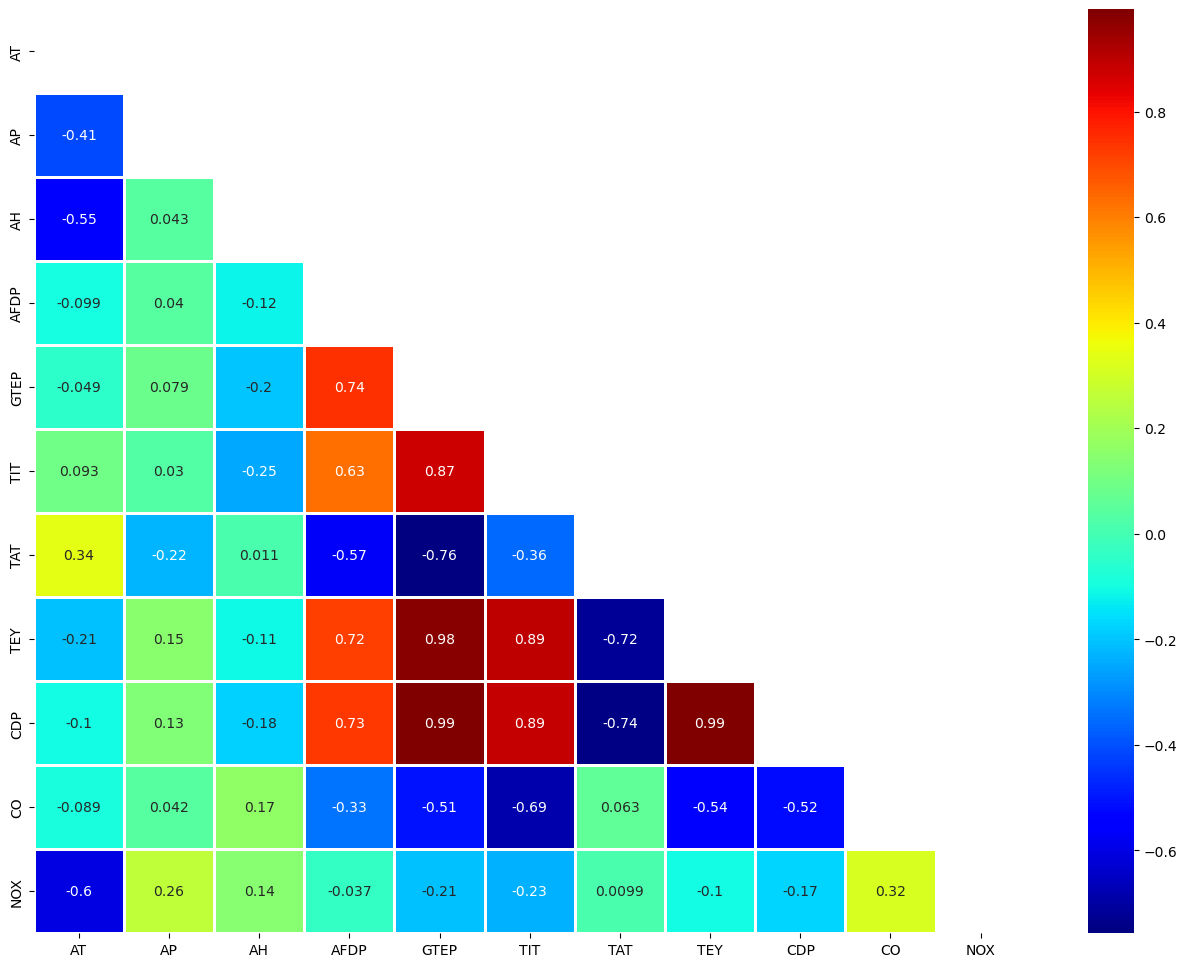

In [13]:
# Having a look at the correlation matrix

plt.figure(figsize=(16,12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=data.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [14]:
x = data.drop('TEY', axis=1)
y = data[["TEY"]]

Text(0.5, 1.0, 'Correlation with Turbine energy yield \n')

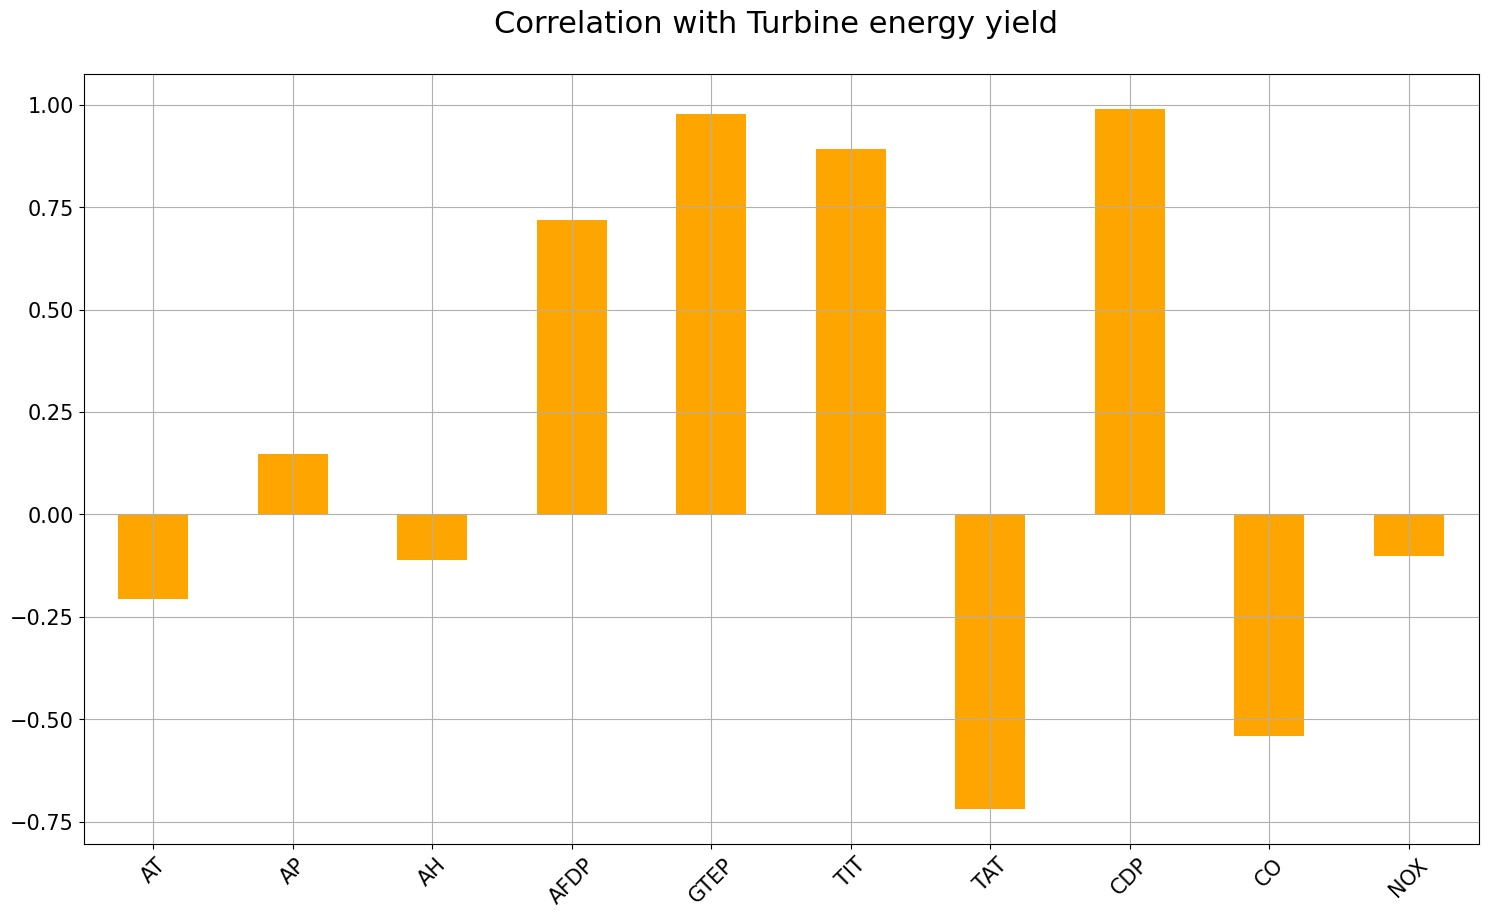

In [15]:
data2 = data.copy()

correlations = data2.corrwith(data.TEY)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Turbine energy yield \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

In [16]:
#Feature importance
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_regression

In [17]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [18]:
# summarize scores
scores = fit.scores_
features = fit.transform(x)

In [19]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
7,1.711840,CDP
4,1.599924,GTEP
5,1.323751,TIT
6,0.893316,TAT
3,0.660635,AFDP
8,0.512833,CO
0,0.412628,AT
9,0.300801,NOX
1,0.137186,AP
2,0.097339,AH


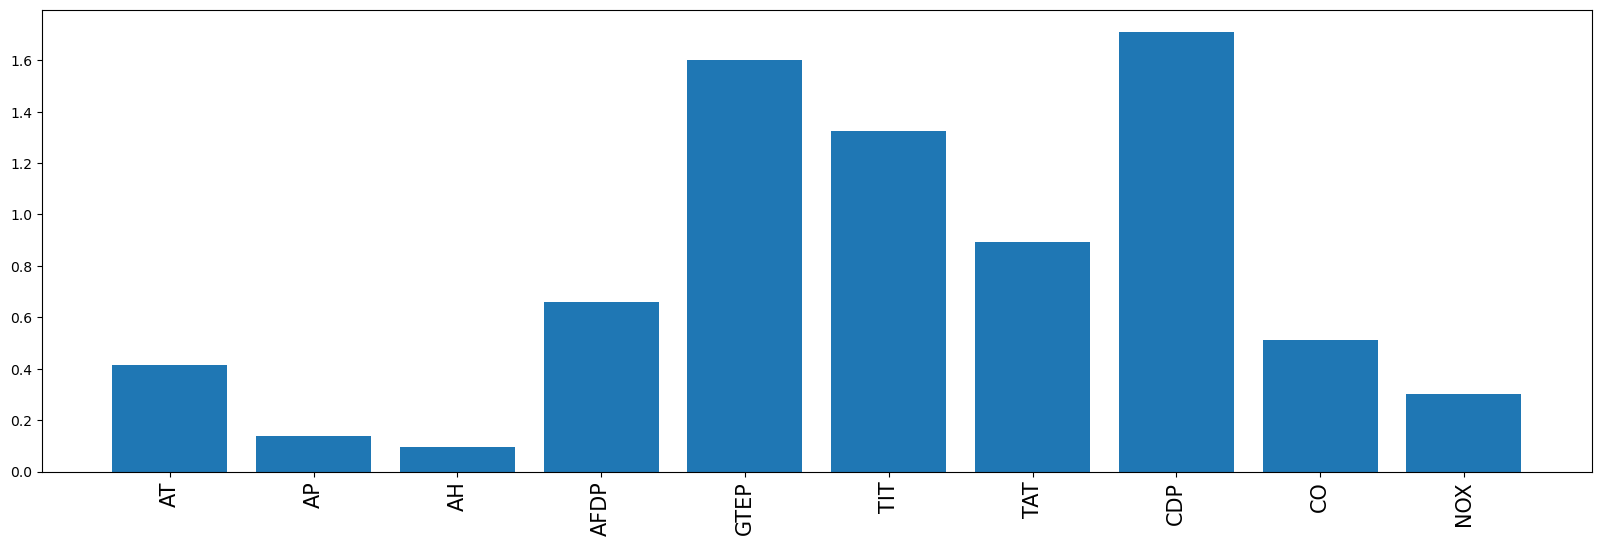

In [20]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
axes.set_xticklabels(x.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

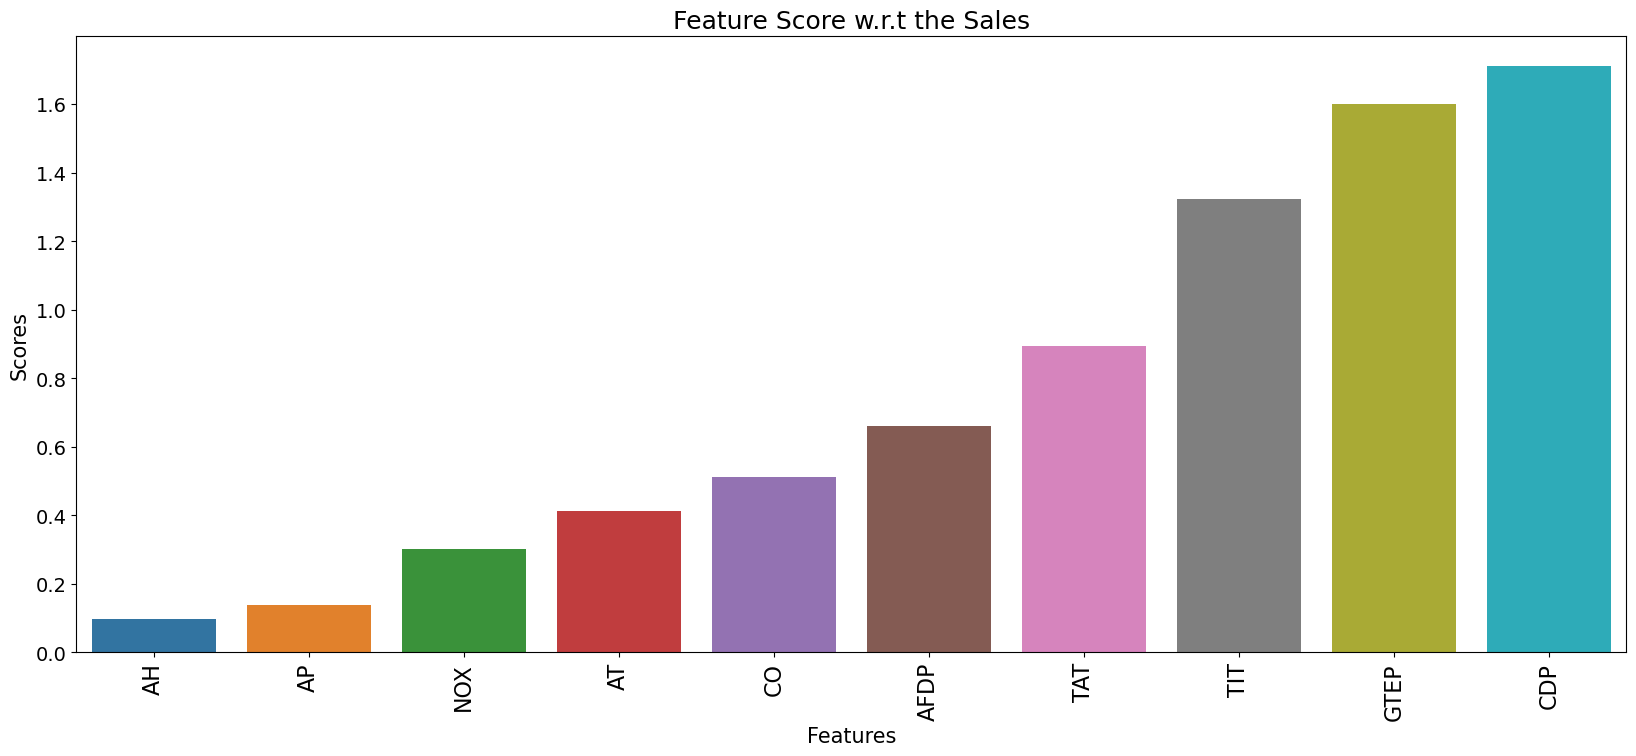

In [21]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score", 
            data=score_df, 
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [22]:
score_df.sort_values('Score',ascending=False)

,Score,Feature
7,1.711840,CDP
4,1.599924,GTEP
5,1.323751,TIT
6,0.893316,TAT
3,0.660635,AFDP
8,0.512833,CO
0,0.412628,AT
9,0.300801,NOX
1,0.137186,AP
2,0.097339,AH


In [23]:
model_data = data[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


In [24]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [25]:
df_standard_scaled = model_data.copy()
features = df_standard_scaled[continuous_feature]

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
df_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


In [27]:
print('Mean' '\n',np.round(df_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(df_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP    0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT     -0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


In [28]:
x = df_standard_scaled.drop('TEY',axis=1)
y = df_standard_scaled[['TEY']]

In [29]:
# Splitting data into test data and train data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [30]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [31]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

Reloading Tuner from project\Gas Turbine\tuner0.json


In [32]:
tuner.search_space_summary()

Search space summary
Default search space size: 19
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_6

In [33]:
tuner.search(x_train, y_train,epochs=10,validation_data=(x_test, y_test))

Trial 5 Complete [00h 01m 36s]
val_mean_absolute_error: 0.030802254875500996

Best val_mean_absolute_error So Far: 0.025066923970977466
Total elapsed time: 00h 22m 00s


In [34]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Objective(name="val_mean_absolute_error", direction="min")

Trial 1 summary
Hyperparameters:
num_layers: 2
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 64
units_3: 96
units_4: 64
units_5: 96
units_6: 64
units_7: 32
units_8: 64
units_9: 64
units_10: 96
units_11: 32
units_12: 64
units_13: 64
units_14: 64
units_15: 32
units_16: 96
Score: 0.025066923970977466

Trial 0 summary
Hyperparameters:
num_layers: 17
units_0: 96
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
units_15: 32
units_16: 32
Score: 0.025988434130946796

Trial 3 summary
Hyperparameters:
num_layers: 8
units_0: 96
units_1: 32
learning_rate: 0.001
units_2: 96
units_3: 64
units_4: 32
units_5: 96
units_6: 96
units_7: 32
units_8: 32
units_9: 96
units_10: 64
units_11: 32
units_12: 96
units_13: 64
units_14: 96


In [35]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [36]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [37]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.038 total time=  18.8s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.056 total time=  17.8s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.045 total time=  17.5s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.037 total time=  17.5s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.044 total time=  17.7s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=40, epochs=100;, score=-0.029 total time=  35.5s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=40, epochs=100;, score=-0.034 total time=  28.3s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=40, epochs=100;, score=-0.039 total time=  28.4s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=40, epochs=100;, score=-0.031 total time=  29.3s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=40, epochs=100;, score=-0.030 total time=  28.6s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=40, epochs=200;, score=-0.028 total time=  56.5s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [38]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.028437687456607817, using {'batch_size': 50, 'epochs': 100}
-0.04399603232741356,0.006846664339188889 with {'batch_size': 10, 'epochs': 10}
-0.03997723497450352,0.010721515239038975 with {'batch_size': 10, 'epochs': 50}
-0.03245211131870747,0.004545058010111116 with {'batch_size': 10, 'epochs': 100}
-0.03002130761742592,0.0031804390033047447 with {'batch_size': 10, 'epochs': 200}
-0.042943640053272246,0.010409449263544965 with {'batch_size': 20, 'epochs': 10}
-0.03957558162510395,0.009321647730412237 with {'batch_size': 20, 'epochs': 50}
-0.03854636400938034,0.007530638132957438 with {'batch_size': 20, 'epochs': 100}
-0.032203898206353186,0.0038008598097140065 with {'batch_size': 20, 'epochs': 200}
-0.045430046319961545,0.005944347626205259 with {'batch_size': 40, 'epochs': 10}
-0.03239031322300434,0.0027903484272047106 with {'batch_size': 40, 'epochs': 50}
-0.032583847641944885,0.003585747331210246 with {'batch_size': 40, 'epochs': 100}
-0.031922978907823564,0.0033197068935631

In [39]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [40]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [41]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.030 total time= 1.2min
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.030 total time=  59.9s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.036 total time= 1.2min
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.032 total time= 1.2min
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.046 total time= 1.1min
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [42]:
# Model Building Neural Networks

In [43]:
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [44]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [45]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)


Epoch 1/100
169/169 [==============================] - 2s 4ms/step - loss: 17600.4062 - mae: 131.7006 - mse: 17600.4043 - val_loss: 16746.0391 - val_mae: 128.4445 - val_mse: 16746.0391
Epoch 2/100
169/169 [==============================] - 1s 4ms/step - loss: 16250.7217 - mae: 126.4812 - mse: 16250.7236 - val_loss: 15695.3369 - val_mae: 124.2873 - val_mse: 15695.3369
Epoch 3/100
169/169 [==============================] - 1s 3ms/step - loss: 15277.8613 - mae: 122.5765 - mse: 15277.8613 - val_loss: 14779.0518 - val_mae: 120.5448 - val_mse: 14779.0518
Epoch 4/100
169/169 [==============================] - 1s 3ms/step - loss: 14395.1572 - mae: 118.9224 - mse: 14395.1572 - val_loss: 13928.5332 - val_mae: 116.9639 - val_mse: 13928.5332
Epoch 5/100
169/169 [==============================] - 1s 3ms/step - loss: 13567.9424 - mae: 115.3931 - mse: 13567.9424 - val_loss: 13125.8682 - val_mae: 113.4808 - val_mse: 13125.8682
Epoch 6/100
169/169 [==============================] - 1s 3ms/step - loss:

169/169 [==============================] - 1s 3ms/step - loss: 363.1237 - mae: 15.9094 - mse: 363.1237 - val_loss: 341.2009 - val_mae: 15.4512 - val_mse: 341.2009
Epoch 46/100
169/169 [==============================] - 1s 3ms/step - loss: 335.1588 - mae: 15.1568 - mse: 335.1588 - val_loss: 316.5589 - val_mae: 14.7251 - val_mse: 316.5589
Epoch 47/100
169/169 [==============================] - 1s 3ms/step - loss: 312.8896 - mae: 14.4747 - mse: 312.8896 - val_loss: 297.3036 - val_mae: 14.0751 - val_mse: 297.3036
Epoch 48/100
169/169 [==============================] - 1s 3ms/step - loss: 295.5430 - mae: 13.8646 - mse: 295.5430 - val_loss: 282.6746 - val_mae: 13.4992 - val_mse: 282.6746
Epoch 49/100
169/169 [==============================] - 1s 3ms/step - loss: 282.3189 - mae: 13.3201 - mse: 282.3189 - val_loss: 271.5271 - val_mae: 12.9804 - val_mse: 271.5271
Epoch 50/100
169/169 [==============================] - 1s 4ms/step - loss: 272.4814 - mae: 12.8557 - mse: 272.4814 - val_loss: 263.4

Epoch 93/100
169/169 [==============================] - 1s 4ms/step - loss: 0.8294 - mae: 0.5826 - mse: 0.8294 - val_loss: 0.8313 - val_mae: 0.6054 - val_mse: 0.8313
Epoch 94/100
169/169 [==============================] - 1s 3ms/step - loss: 0.7799 - mae: 0.5736 - mse: 0.7799 - val_loss: 0.7423 - val_mae: 0.5717 - val_mse: 0.7423
Epoch 95/100
169/169 [==============================] - 1s 5ms/step - loss: 0.7482 - mae: 0.5662 - mse: 0.7482 - val_loss: 0.6557 - val_mae: 0.5230 - val_mse: 0.6557
Epoch 96/100
169/169 [==============================] - 1s 5ms/step - loss: 0.6883 - mae: 0.5457 - mse: 0.6883 - val_loss: 0.6951 - val_mae: 0.5858 - val_mse: 0.6951
Epoch 97/100
169/169 [==============================] - 1s 3ms/step - loss: 0.6747 - mae: 0.5476 - mse: 0.6747 - val_loss: 0.5960 - val_mae: 0.5092 - val_mse: 0.5960
Epoch 98/100
169/169 [==============================] - 0s 3ms/step - loss: 0.6609 - mae: 0.5474 - mse: 0.6609 - val_loss: 0.5794 - val_mae: 0.5141 - val_mse: 0.5794
Epoc

In [46]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fitting the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',100-MAPE)

    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 1s 2ms/step
batch_size: 5 - epochs: 5 Accuracy: TEY    97.822259
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 10 Accuracy: TEY    99.399846
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 50 Accuracy: TEY    99.682362
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 5 - epochs: 100 Accuracy: TEY    99.57807
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 5 Accuracy: TEY    81.064829
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 10 Accuracy: TEY    98.456903
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 50 Accuracy: TEY    99.525994
dtype: float64
94/94 [==============================] - 0s 2ms/step
batch_size: 10 - epochs: 100 Accuracy: TEY    99.652688
dtype: float64
94/94 [==============

,batchsize,epochs,Accuracy
0,5,5,TEY 97.822259 dtype: float64
0,5,10,TEY 99.399846 dtype: float64
0,5,50,TEY 99.682362 dtype: float64
0,5,100,TEY 99.57807 dtype: float64
0,10,5,TEY 81.064829 dtype: float64
0,10,10,TEY 98.456903 dtype: float64
0,10,50,TEY 99.525994 dtype: float64
0,10,100,TEY 99.652688 dtype: float64
0,15,5,TEY 58.990331 dtype: float64
0,15,10,TEY 89.804817 dtype: float64


In [48]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

In [50]:
model.history.history

{'loss': [0.5850746035575867,
  0.5326129794120789,
  0.5100535154342651,
  0.500978410243988,
  0.4928651452064514,
  0.47376304864883423,
  0.4730003774166107,
  0.4786366820335388,
  0.46843263506889343,
  0.4519950747489929,
  0.46089598536491394,
  0.45121151208877563,
  0.45231643319129944,
  0.4426014721393585,
  0.4355146884918213,
  0.4382978677749634,
  0.4371771812438965,
  0.4268737733364105,
  0.42175647616386414,
  0.4391845762729645,
  0.41513803601264954,
  0.42662715911865234,
  0.41673770546913147,
  0.4228888750076294,
  0.4095563590526581,
  0.41507184505462646,
  0.4169211685657501,
  0.42076581716537476,
  0.40031322836875916,
  0.42262399196624756,
  0.405295729637146,
  0.41452640295028687,
  0.39185723662376404,
  0.4056300222873688,
  0.3977820873260498,
  0.4105113744735718,
  0.40941399335861206,
  0.40212398767471313,
  0.3816027045249939,
  0.3854704797267914,
  0.3835855722427368,
  0.39505720138549805,
  0.40448400378227234,
  0.3938777446746826,
  0.381

In [52]:
model.history.history['mse']

KeyError: 'mse'

In [56]:
# generating predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 2ms/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.691086
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.376724
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.329147
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.036591
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,111.056854
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,113.967896
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.748215
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,129.299957
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,161.159973
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,161.041901


In [57]:
# Computing the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.62690412948938


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted,APE %
13312,12.219,25.762,1092.5,550.25,4.0023,1.2643,24.093,134.46,134.691086,0.171862
12627,10.791,20.085,1059.6,549.94,3.2106,2.6937,20.450,111.88,112.376724,0.443979
6393,12.126,25.221,1089.9,549.62,4.5325,1.9625,20.262,133.72,134.329147,0.455539
4990,12.218,25.965,1092.9,549.96,4.4266,1.5712,26.862,133.79,134.036591,0.184312
12462,10.466,19.688,1056.9,550.01,3.1241,2.2996,19.409,110.77,111.056854,0.258964


In [58]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted,APE %,Error
0,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.093,134.46,134.691086,0.171862,-0.001719
1,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.450,111.88,112.376724,0.443979,-0.004440
2,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.262,133.72,134.329147,0.455539,-0.004555
3,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.862,133.79,134.036591,0.184312,-0.001843
4,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.409,110.77,111.056854,0.258964,-0.002590
...,...,...,...,...,...,...,...,...,...,...,...
3003,11.083,21.936,1069.6,549.87,3.3145,1.42310,21.692,119.25,119.494980,0.205434,-0.002054
3004,12.205,25.864,1093.6,550.41,4.0224,0.78249,27.200,133.74,134.118301,0.282863,-0.002829
3005,13.081,29.741,1099.5,541.25,4.7190,1.64630,29.073,146.31,146.784027,0.323988,-0.003240
3006,13.311,30.052,1099.9,538.12,4.8017,0.84607,23.404,150.07,149.803528,0.177565,0.001776


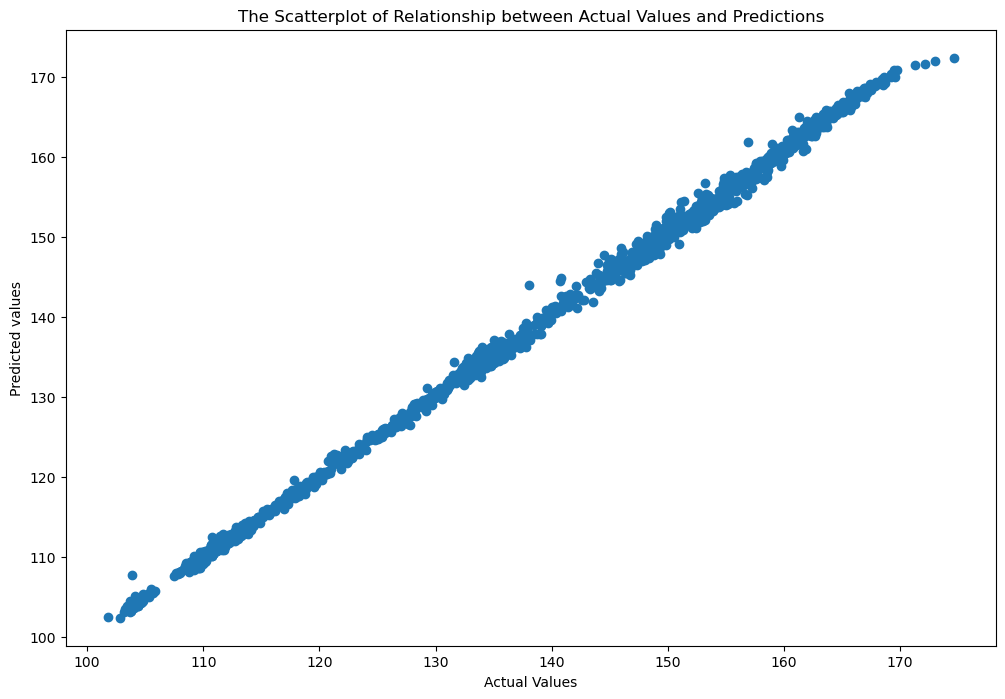

In [59]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])